In [1]:
import os
import ntpath
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# Define data directories
straight_dir = '..\\straight_30_hz\\even\\clean_t_1_0_run_05'
skidpad_dir = '..\\skidpad_30_hz\\ccw\\clean_t_1_0_s_0_1047'
fishhook_dir = '..\\fishhook_30_hz\\ccw\\clean_t_1_0_run_05'
slalom_dir = '..\\slalom_30_hz\\ccw\\clean_t_0_2_s_0_5236'

In [3]:
# Define function to shorten path names
def shorten_path(path):
    '''
    Function to view shortened paths.
    '''
    head,tail = ntpath.split(path)
    return tail

In [4]:
# Read the data
headers = ['timestamp','throttle','steering','leftTicks','rightTicks','posX','posY','posZ','roll','pitch','yaw','speed','angX','angY','angZ','accX','accY','accZ']
straight_log = pd.read_csv(os.path.join(straight_dir,'V1 Log.csv'), names = headers)
skidpad_log = pd.read_csv(os.path.join(skidpad_dir,'V1 Log.csv'), names = headers)
fishhook_log = pd.read_csv(os.path.join(fishhook_dir,'V1 Log.csv'), names = headers)
slalom_log = pd.read_csv(os.path.join(slalom_dir,'V1 Log.csv'), names = headers)

# Preprocess the data
for log in [straight_log, skidpad_log, fishhook_log, slalom_log]:
    # Convert timestamp from string to datetime format
    log['timestamp'] = pd.to_datetime(log['timestamp'], format='%Y_%m_%d_%H_%M_%S_%f')
    # Reset initial time to zero and update elapsed time thereafter in seconds
    position = log.columns.get_loc('timestamp')
    log['elapsed'] =  log.iloc[1:, position] - log.iat[0, position]
    log['elapsedTime'] = log['elapsed'].dt.total_seconds()
    log['elapsedTime'].iat[0] = 0
    del log[log.columns[-2]]

# View the first 5 entries in the dataframe
# straight_log.head()
# skidpad_log.head()
# fishhook_log.head()
# slalom_log.head()

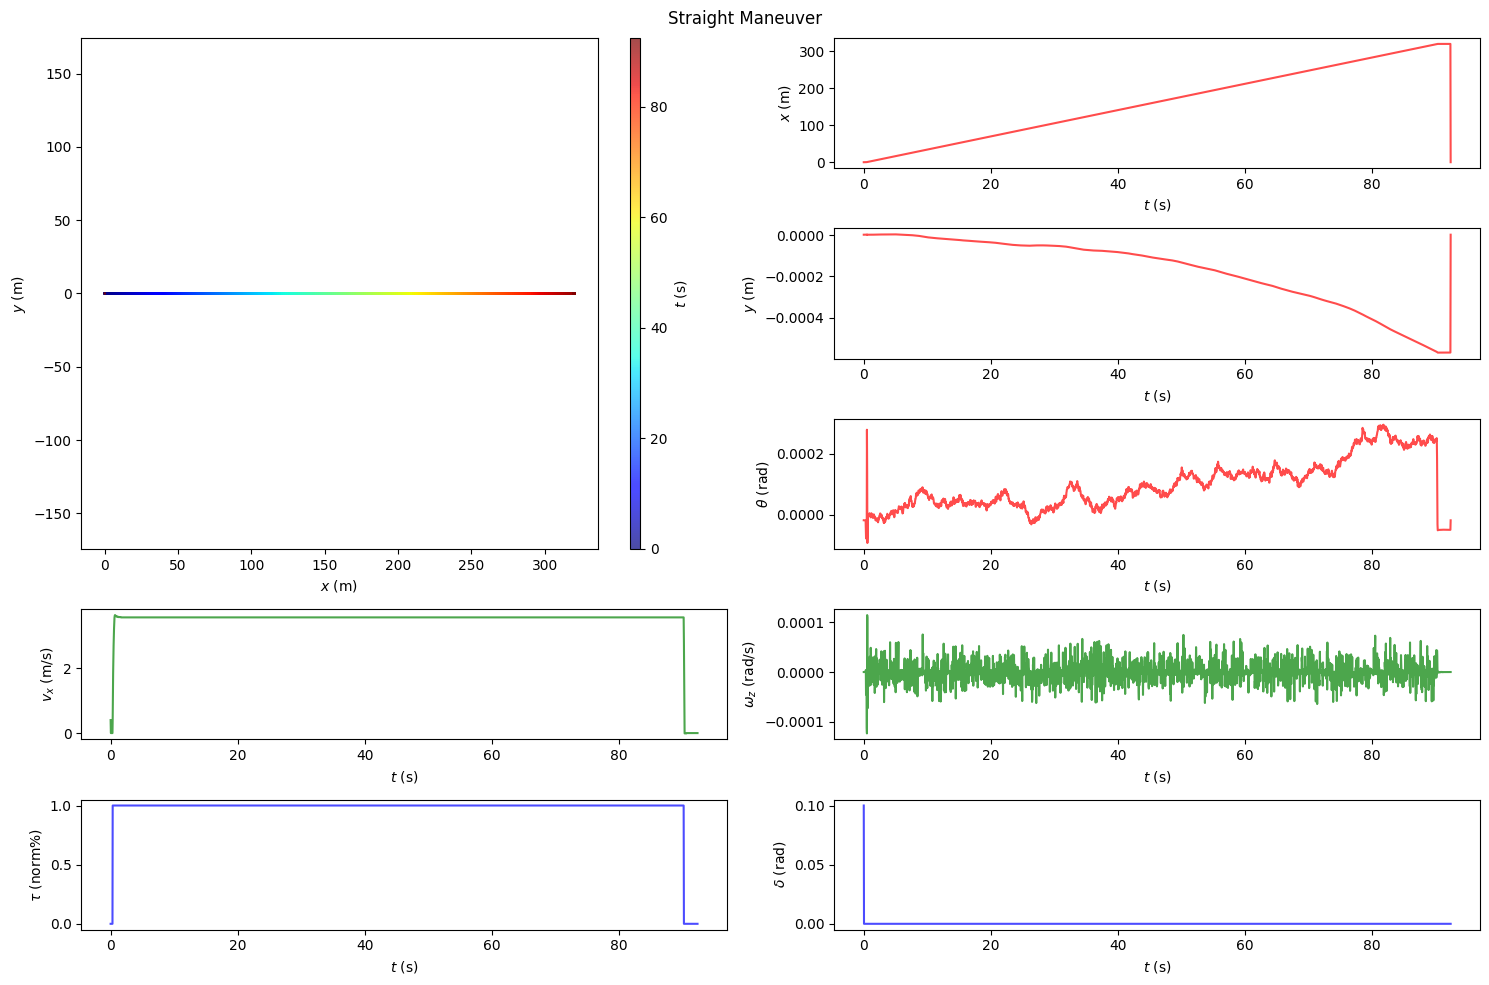

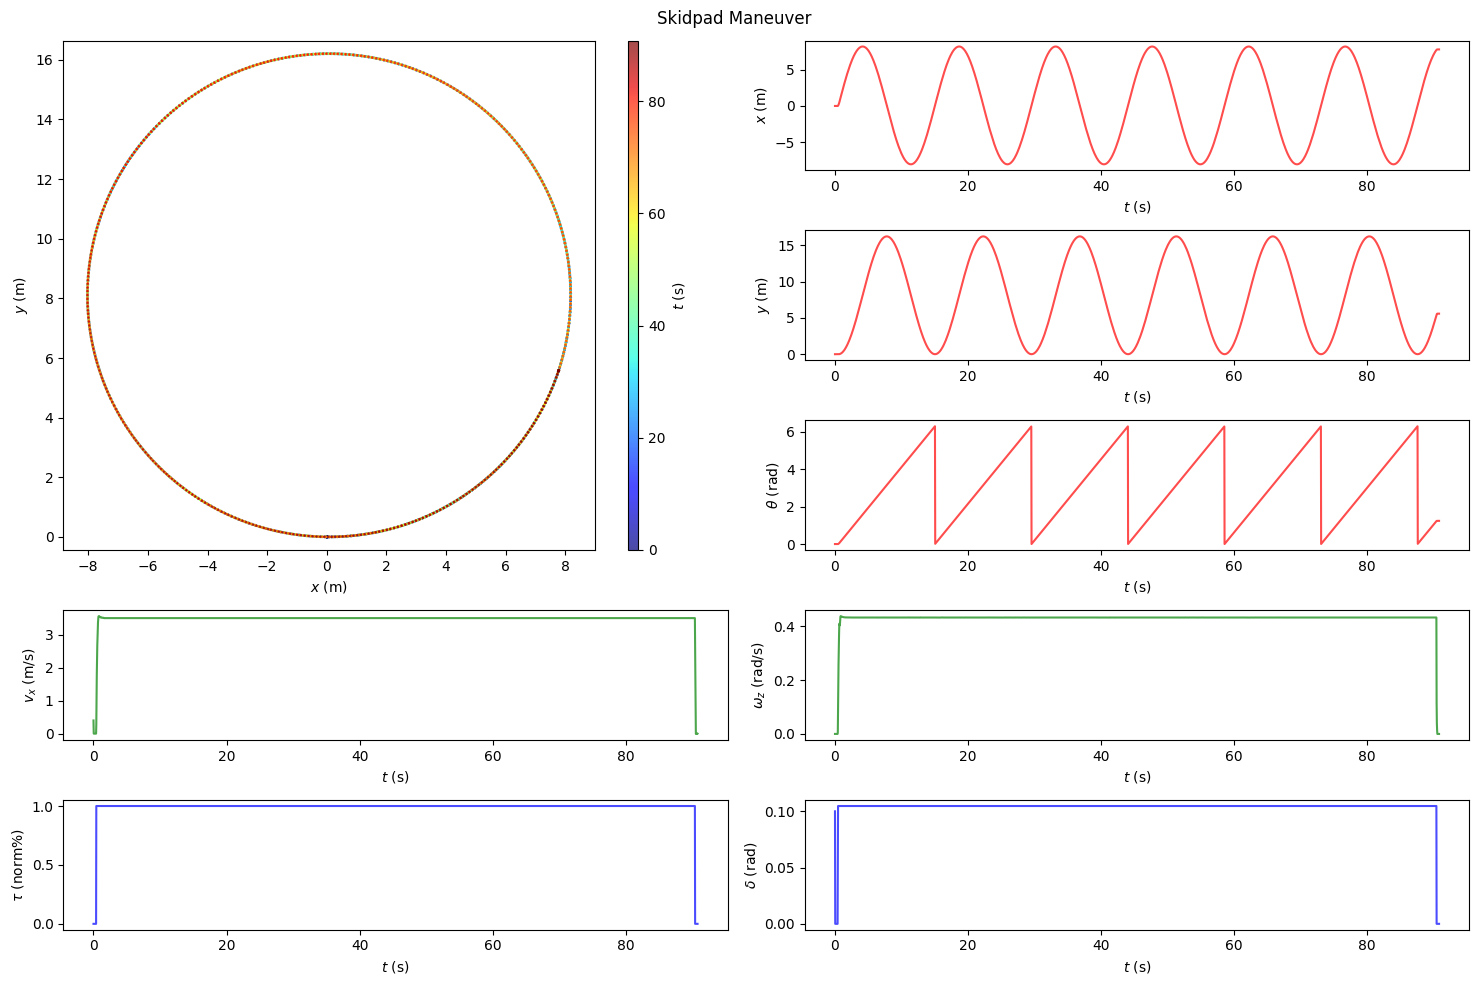

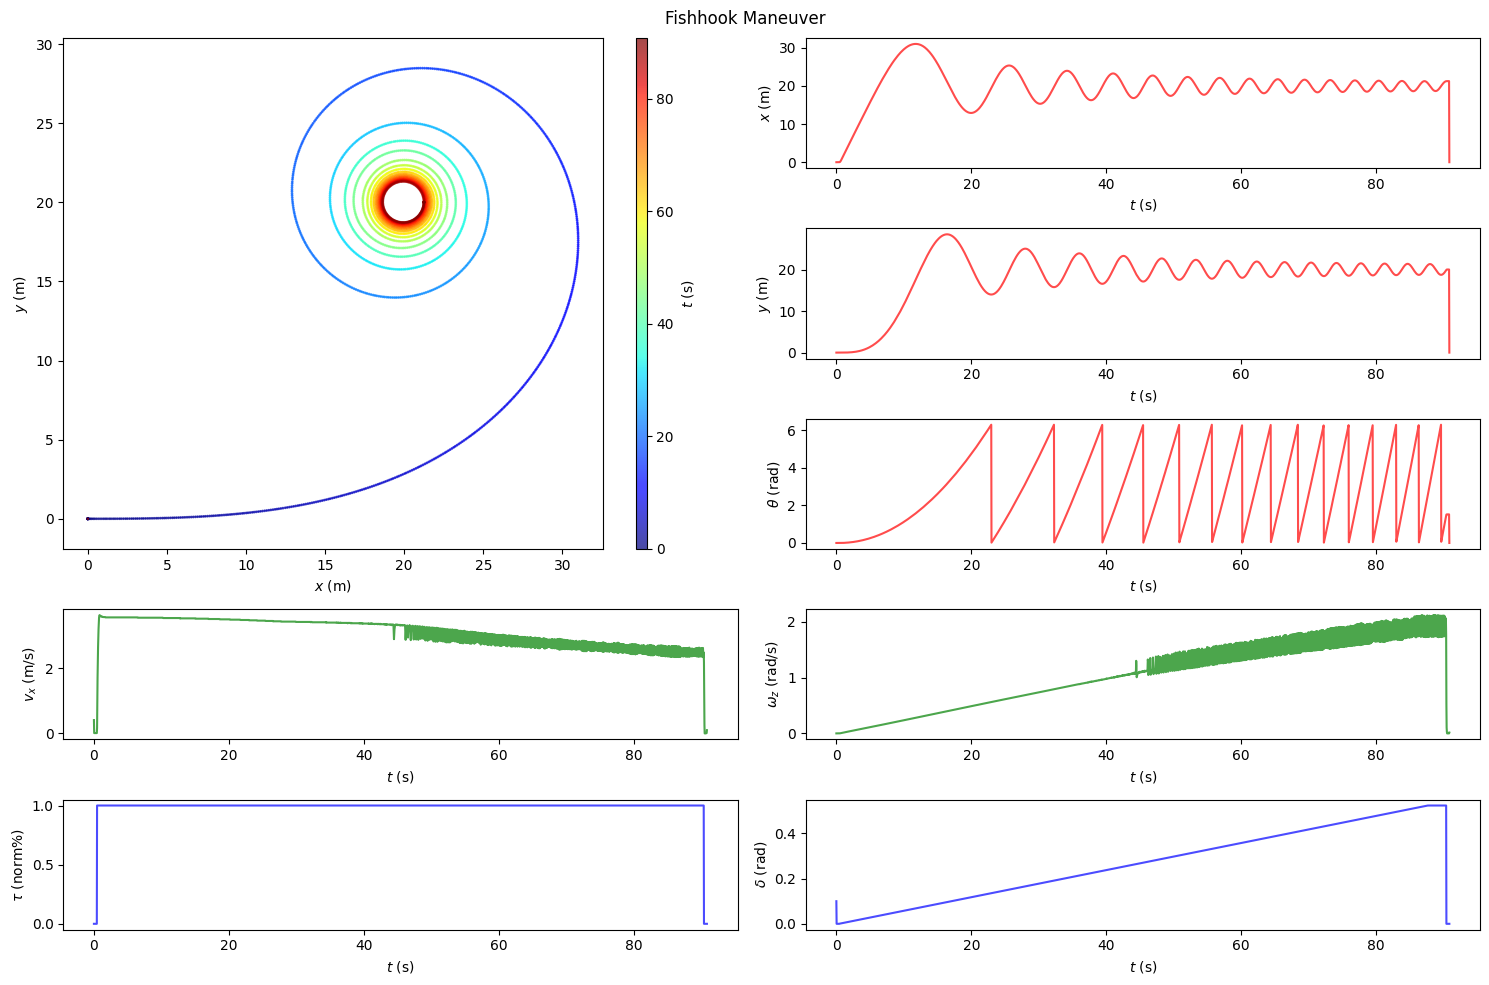

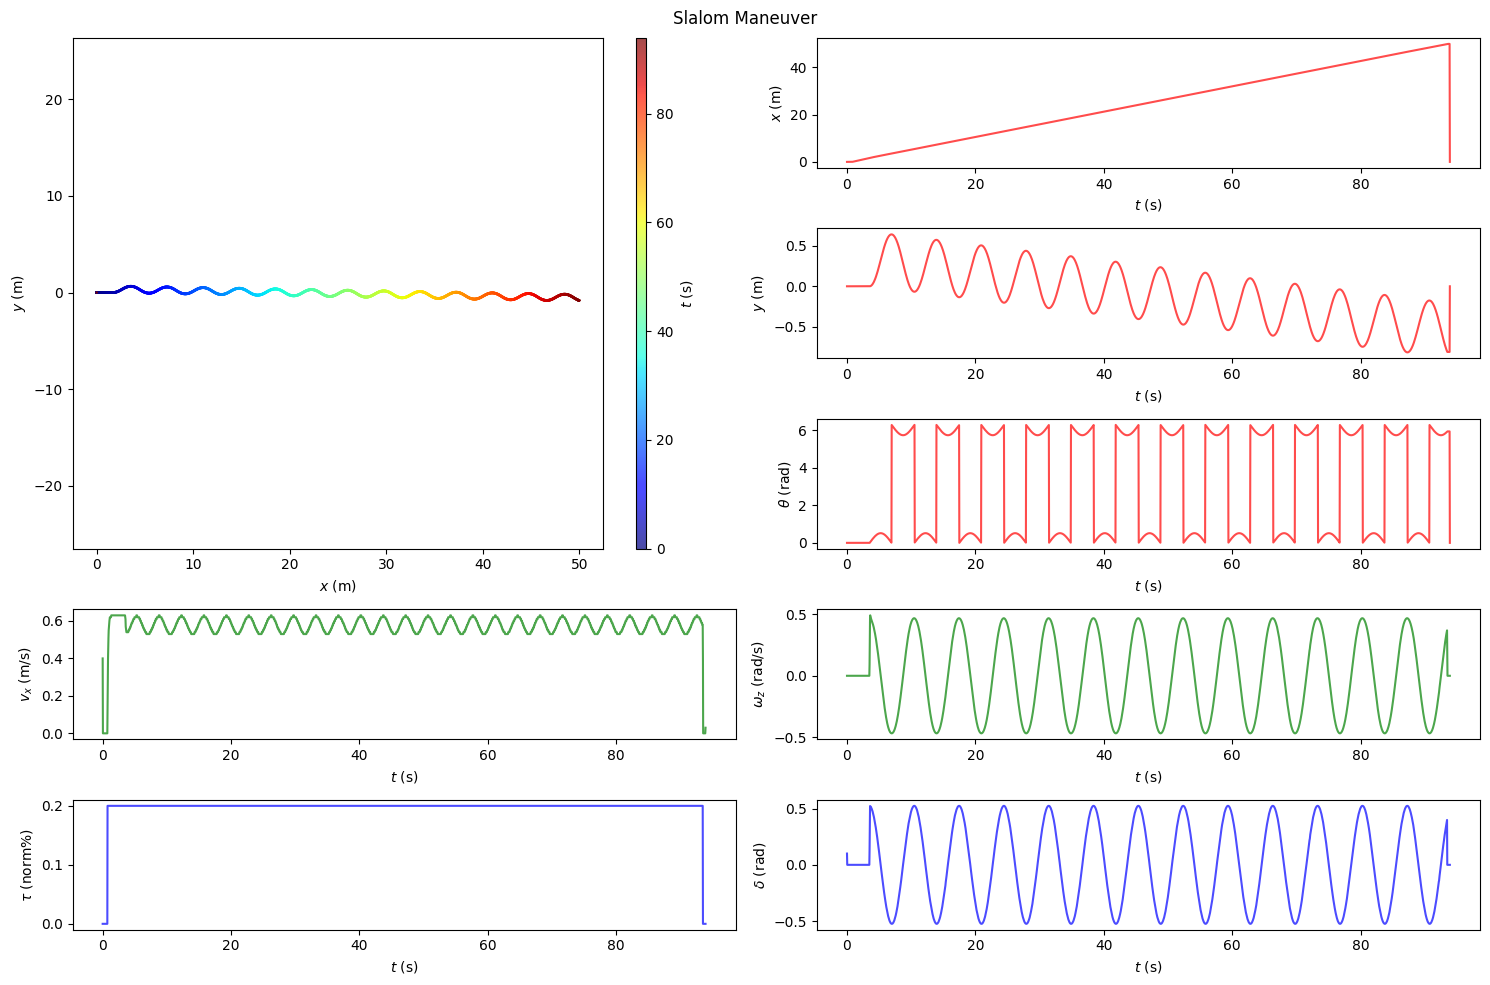

In [5]:
# Visualize the data

for log in [straight_log, skidpad_log, fishhook_log, slalom_log]:
    # Set figure size and sub-plot grid
    fig = plt.figure(figsize=(15, 10))
    if log is straight_log:
        fig.suptitle("Straight Maneuver")
    elif log is skidpad_log:
        fig.suptitle("Skidpad Maneuver")
    elif log is fishhook_log:
        fig.suptitle("Fishhook Maneuver")
    elif log is slalom_log:
        fig.suptitle("Slalom Maneuver")
    G = gridspec.GridSpec(5, 2)
    # Plot Y-position vs. X-position
    axes_1 = plt.subplot(G[0:3, 0])
    pos = axes_1.scatter(np.asarray(log['posX']), np.asarray(log['posY']), s=1, alpha=0.7,
                         c=np.asarray(log['elapsedTime']), cmap=mpl.colormaps['jet'])
    fig.colorbar(pos, ax=axes_1, label=r"$t$ (s)", aspect=50)
    axes_1.axis('equal')
    axes_1.set_xlabel(r"$x$ (m)")
    axes_1.set_ylabel(r"$y$ (m)")
    # Plot X-position vs. elapsed time
    axes_2 = plt.subplot(G[0, 1])
    axes_2.plot(np.asarray(log['elapsedTime']), np.asarray(log['posX']), 'red', alpha=0.7)
    axes_2.set_xlabel(r"$t$ (s)")
    axes_2.set_ylabel(r"$x$ (m)")
    # Plot Y-position vs. elapsed time
    axes_3 = plt.subplot(G[1, 1])
    axes_3.plot(np.asarray(log['elapsedTime']), np.asarray(log['posY']), 'red', alpha=0.7)
    axes_3.set_xlabel(r"$t$ (s)")
    axes_3.set_ylabel(r"$y$ (m)")
    # Plot yaw vs. elapsed time
    axes_4 = plt.subplot(G[2, 1])
    axes_4.plot(np.asarray(log['elapsedTime']), np.asarray(log['yaw']), 'red', alpha=0.7)
    axes_4.set_xlabel(r"$t$ (s)")
    axes_4.set_ylabel(r"$\theta$ (rad)")
    # Plot speed vs. elapsed time
    axes_5 = plt.subplot(G[3, 0])
    axes_5.plot(np.asarray(log['elapsedTime']), np.asarray(log['speed']), 'green', alpha=0.7)
    axes_5.set_xlabel(r"$t$ (s)")
    axes_5.set_ylabel(r"$v_x$ (m/s)")
    # Plot yaw rate vs. elapsed time
    axes_6 = plt.subplot(G[3, 1])
    axes_6.plot(np.asarray(log['elapsedTime']), np.asarray(log['angZ']), 'green', alpha=0.7)
    axes_6.set_xlabel(r"$t$ (s)")
    axes_6.set_ylabel(r"$\omega_z$ (rad/s)")
    # Plot throttle vs. elapsed time
    axes_7 = plt.subplot(G[4, 0])
    axes_7.plot(np.asarray(log['elapsedTime']), np.asarray(log['throttle']), 'blue', alpha=0.7)
    axes_7.set_xlabel(r"$t$ (s)")
    axes_7.set_ylabel(r"$\tau$ (norm%)")
    # Plot steering angle vs. elapsed time
    axes_8 = plt.subplot(G[4, 1])
    axes_8.plot(np.asarray(log['elapsedTime']), np.asarray(log['steering']), 'blue', alpha=0.7)
    axes_8.set_xlabel(r"$t$ (s)")
    axes_8.set_ylabel(r"$\delta$ (rad)")
    # Show the plot
    plt.tight_layout()
    plt.show()